In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_results = pd.read_csv("../Results/InvestmentModelResults/Loop_4models_neighbors_only_v2_8760.csv")

In [3]:
def create_model_type_name(row,columns):
    strings = [str(row[col]) for col in columns if pd.notna(row[col])]
    return '-'.join(strings)

In [4]:
geo_scope_map = {
    'A_l_l': 'All',
    'DE00_NL00_FR00_UK00_BE00_LUG1': 'DN',
    'N_A': ''
}
df_results["geoscope_m"] = df_results["geoscope"].map(geo_scope_map)

# List of columns to consider for joining
columns_to_join = ['type', 'trans_cap_other', 'geoscope_m']

# Apply the function row-wise to create the new column
df_results['name'] = df_results.apply(create_model_type_name, args=(columns_to_join,), axis=1)

name_map = {
    'NTC-1.0e10-DN': 'SN-DN',
    'NTC-1.0e10-All': 'SN-All',
    'NTC-S-All': "NTC-All",
    'NTC-S-DN': "NTC-DN",
    'TCPC-All': "TCPC",
    
}
df_results['Model Type'] = df_results["name"].replace(name_map)

In [5]:
# Assuming df_results is your DataFrame

# Define the condition
condition = df_results["trans_cap_other"] == "1.0e10"

# Update the "type" column where the condition is met
df_results.loc[condition, "type"] = "SN"



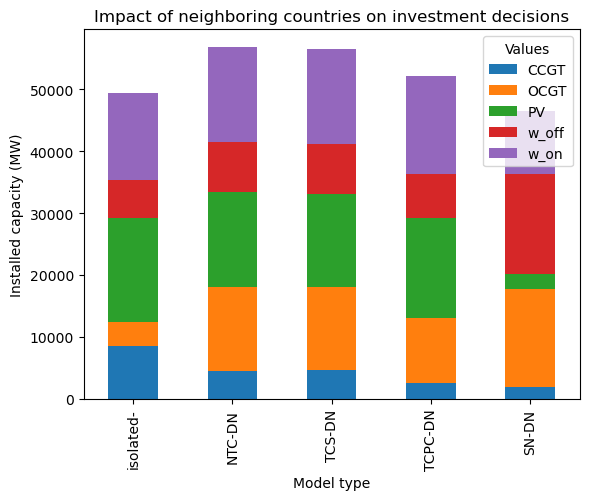

In [7]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Define the filter condition
filter_condition = ((df_results["trans_cap_other"].isin(["S", "1.0e10"])) | pd.isna(df_results["trans_cap_other"])) & ((df_results["stepsize"] == 100) | (pd.isna(df_results["stepsize"])))

# Define the order in which you want the types to appear
type_order = ["isolated", "NTC", "TCS", "TCPC","SN"]

# Reorder the DataFrame based on the desired order
filtered_df = df_results[filter_condition].set_index("type").reindex(type_order).reset_index()

# Define the values to plot
vals = ["CCGT", "OCGT", "PV", "w_off", "w_on"]

# Plotting the stacked bar chart
filtered_df.plot.bar(x="Model Type", y=vals, stacked=True)

plt.xlabel('Model type')
plt.ylabel('Installed capacity (MW)')
plt.title('Impact of neighboring countries on investment decisions')
plt.legend(title='Values')
#plt.show()
#plt.savefig("../Results/Figures/FY_analysis/DirectNeighbors/Installed_capacities_stacked_bar_DN.png")


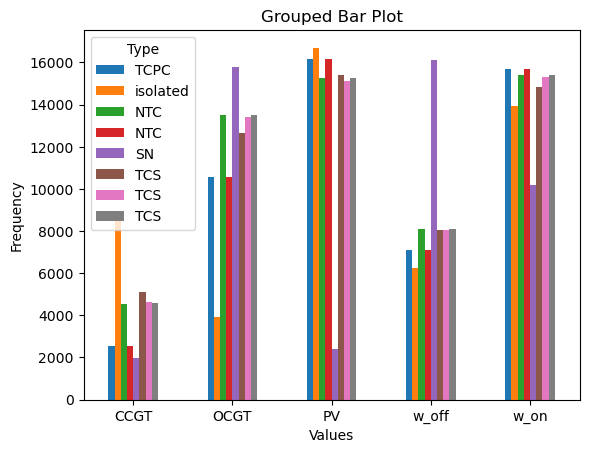

In [20]:
# Transpose the DataFrame
df_transposed = df_results.set_index('type')[vals].transpose()
# Plot the transposed DataFrame
df_transposed.plot.bar(rot=0)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Grouped Bar Plot')
plt.legend(title='Type')
plt.show()

In [106]:
import pandas as pd

# Get deviations from benchmark model
bm_t = "NTC"
bm_tco = "S"

# Filter the DataFrame for the benchmark model
col_bm = df_results[(df_results["type"] == bm_t) & (df_results["trans_cap_other"] == bm_tco)]

# Initialize an empty list to store deviations
dev_data = []

# Calculate deviations from the benchmark model
for index, row in df_results.iterrows():
    t = row["type"]
    stepsize = row["stepsize"]
    trans_cap_other = row["trans_cap_other"]
    deviations = row[vals] - col_bm.iloc[0][vals]  # Accessing the first row of col_bm for deviations
    
    # Create a dictionary for the deviations
    dev_dict = {"type": t, "stepsize": stepsize, "trans_cap_other": trans_cap_other}
    for col, dev in zip(vals, deviations):
        dev_dict[col] = dev
    
    # Append the dictionary to the list
    dev_data.append(dev_dict)

# Create DataFrame from the list of dictionaries
dev_df = pd.DataFrame(dev_data)

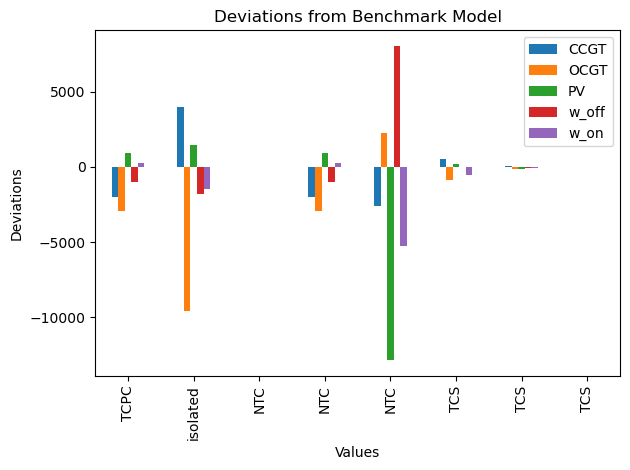

In [107]:
dev_df.plot.bar(x = "type", y = vals)
plt.xlabel('Values')
plt.ylabel('Deviations')
plt.title('Deviations from Benchmark Model')
plt.legend()
plt.tight_layout()
plt.show()


C:\Workdir\Programs\Miniconda\envs\ImportExport\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


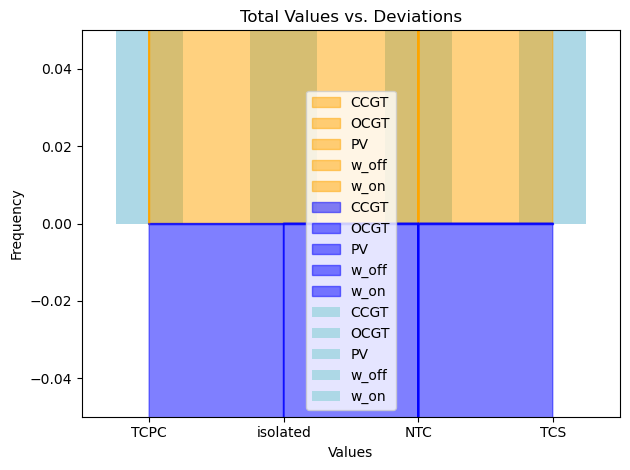

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_results contains the total values and dev_df contains the deviations

# Filtering total values
filter_total = (df_results["trans_cap_other"].isin(["S"])) | (pd.isna(df_results["trans_cap_other"])) & ((df_results["stepsize"]==1000) | (pd.isna(df_results["stepsize"])))
total_values = df_results[filter_total]

# Filtering deviations
filter_deviation = (dev_df["trans_cap_other"].isin(["S"])) | (pd.isna(dev_df["trans_cap_other"])) & ((dev_df["stepsize"]==1000) | (pd.isna(dev_df["stepsize"])))
deviations = dev_df[filter_deviation]

# Split deviations into positive and negative parts
positive_deviations = deviations.copy()
positive_deviations[positive_deviations[vals] < 0] = 0

negative_deviations = deviations.copy()
negative_deviations[negative_deviations[vals] > 0] = 0

# Plotting total values
ax = total_values.plot.bar(x="type", y=vals, color='lightblue')

# Overlaying positive deviations as shaded area
positive_deviations.plot.area(ax=ax, x="type", y=vals, color='orange', alpha=0.5)

# Overlaying negative deviations as shaded area
negative_deviations.plot.area(ax=ax, x="type", y=vals, color='blue', alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Total Values vs. Deviations')
plt.legend()
plt.tight_layout()
plt.show()
